In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [2]:

import gc
def loadSST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2
def loadSST2(fn0,sis,f1=0,f2=512):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,f1:f2])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [13]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f)) and (f[-3:]=='.h5')]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)

67 SST_2022-11-18-14-19-21.h5
0 SST_2022-11-18-14-19-21.h5
1 SST_2022-11-18-15-19-21.h5
2 SST_2022-11-18-16-19-21.h5
3 SST_2022-11-18-17-19-21.h5
4 SST_2022-11-18-18-19-21.h5
5 SST_2022-11-18-19-19-21.h5
6 SST_2022-11-18-20-19-21.h5
7 SST_2022-11-18-21-19-21.h5
8 SST_2022-11-18-22-19-21.h5
9 SST_2022-11-18-23-19-21.h5
10 SST_2022-11-19-00-19-21.h5
11 SST_2022-11-19-01-19-21.h5
12 SST_2022-11-19-02-19-21.h5
13 SST_2022-11-19-03-19-21.h5
14 SST_2022-11-19-04-19-21.h5
15 SST_2022-11-19-05-19-21.h5
16 SST_2022-11-19-06-19-21.h5
17 SST_2022-11-19-07-19-21.h5
18 SST_2022-11-19-08-19-21.h5
19 SST_2022-11-19-09-19-21.h5
20 SST_2022-11-19-10-19-21.h5
21 SST_2022-11-19-11-19-21.h5
22 SST_2022-11-19-12-19-21.h5
23 SST_2022-11-19-13-19-21.h5
24 SST_2022-11-19-14-19-21.h5
25 SST_2022-11-19-15-19-21.h5
26 SST_2022-11-19-16-19-21.h5
27 SST_2022-11-19-17-19-21.h5
28 SST_2022-11-19-18-19-21.h5
29 SST_2022-11-19-19-19-21.h5
30 SST_2022-11-19-20-19-21.h5
31 SST_2022-11-19-21-19-21.h5
32 SST_2022-11-19-22

In [1]:
#sis=[i for i in range(18)] #rcu 8 and 9
#sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
#sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
#meas_RCU2L = [0, 1, 24, 25, 30, 31]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11,12,13]
#meas_RCU2L = [8,9,10,11]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]
#sis=[24,25,26,27,28,29] #inputs set to 110-190 bands
nsi=len(sis)

D=loadSST(fpath+'/'+files[-2],sis)
print(D.shape)


NameError: name 'loadSST' is not defined

In [15]:
for f in files:
    if isfile(join(fpath,f[:-3]+'.npy')):
        continue;
    D=loadSST(fpath+'/'+f,sis)
    print(f,D.shape)
    np.save(fpath+'/'+f[:-3],D)


SST_2022-11-18-14-19-21.h5 (3600, 30, 512)
SST_2022-11-18-15-19-21.h5 (3600, 30, 512)
SST_2022-11-18-16-19-21.h5 (3600, 30, 512)
SST_2022-11-18-17-19-21.h5 (3600, 30, 512)
SST_2022-11-18-18-19-21.h5 (3600, 30, 512)
SST_2022-11-18-19-19-21.h5 (3600, 30, 512)
SST_2022-11-18-20-19-21.h5 (3600, 30, 512)
SST_2022-11-18-21-19-21.h5 (3600, 30, 512)
SST_2022-11-18-22-19-21.h5 (3600, 30, 512)
SST_2022-11-18-23-19-21.h5 (3600, 30, 512)
SST_2022-11-19-00-19-21.h5 (3600, 30, 512)
SST_2022-11-19-01-19-21.h5 (3600, 30, 512)
SST_2022-11-19-02-19-21.h5 (3600, 30, 512)
SST_2022-11-19-03-19-21.h5 (3600, 30, 512)
SST_2022-11-19-04-19-21.h5 (3600, 30, 512)
SST_2022-11-19-05-19-21.h5 (3600, 30, 512)
SST_2022-11-19-06-19-21.h5 (3600, 30, 512)
SST_2022-11-19-07-19-21.h5 (3600, 30, 512)
SST_2022-11-19-08-19-21.h5 (3600, 30, 512)
SST_2022-11-19-09-19-21.h5 (3600, 30, 512)
SST_2022-11-19-10-19-21.h5 (3600, 30, 512)
SST_2022-11-19-11-19-21.h5 (3600, 30, 512)
SST_2022-11-19-12-19-21.h5 (3600, 30, 512)
SST_2022-11

[  6   6   6   6   6 174   6   6   6   6   6   6   6   6   6   6   6   6
  62  83  83  62  62  62 105  83  83  63  62  63]


/tmp/ipykernel_1101529/3700898594.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(Dm));


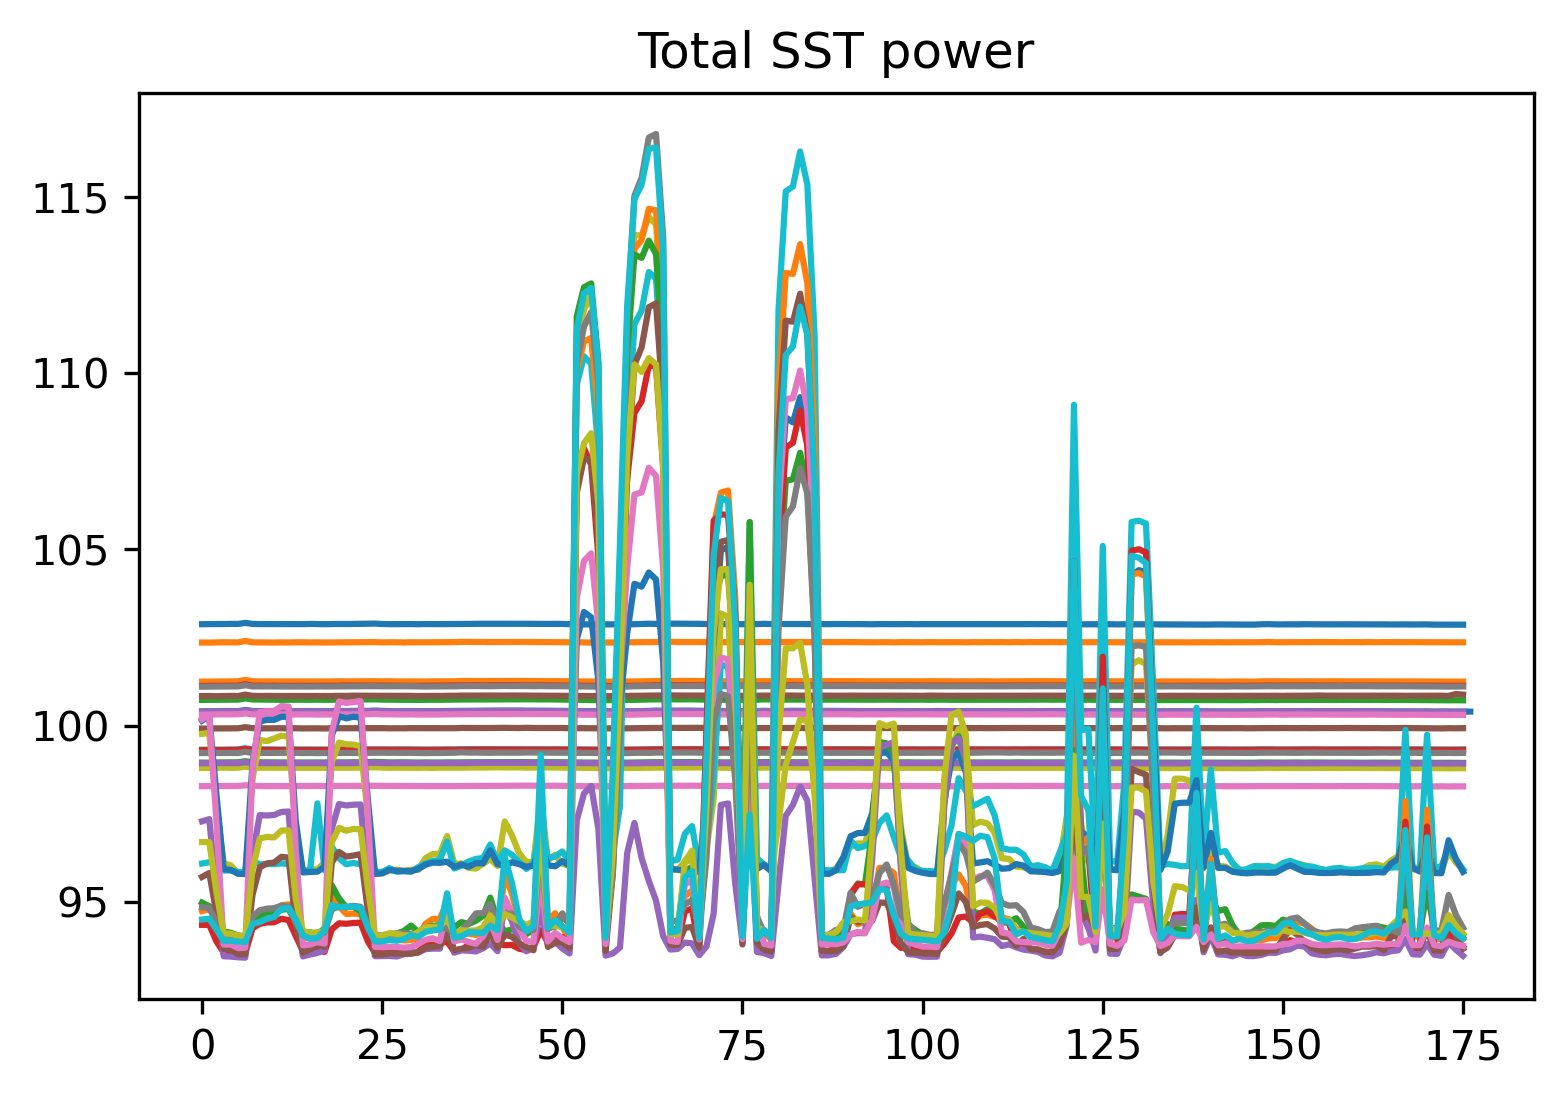

In [6]:
plt.figure(dpi=300)
plt.title("Total SST power")
Dm=np.sum(D[:,:,300:400],axis=2)
print(np.argmax(Dm,axis=0))
plt.plot(10*np.log10(Dm));

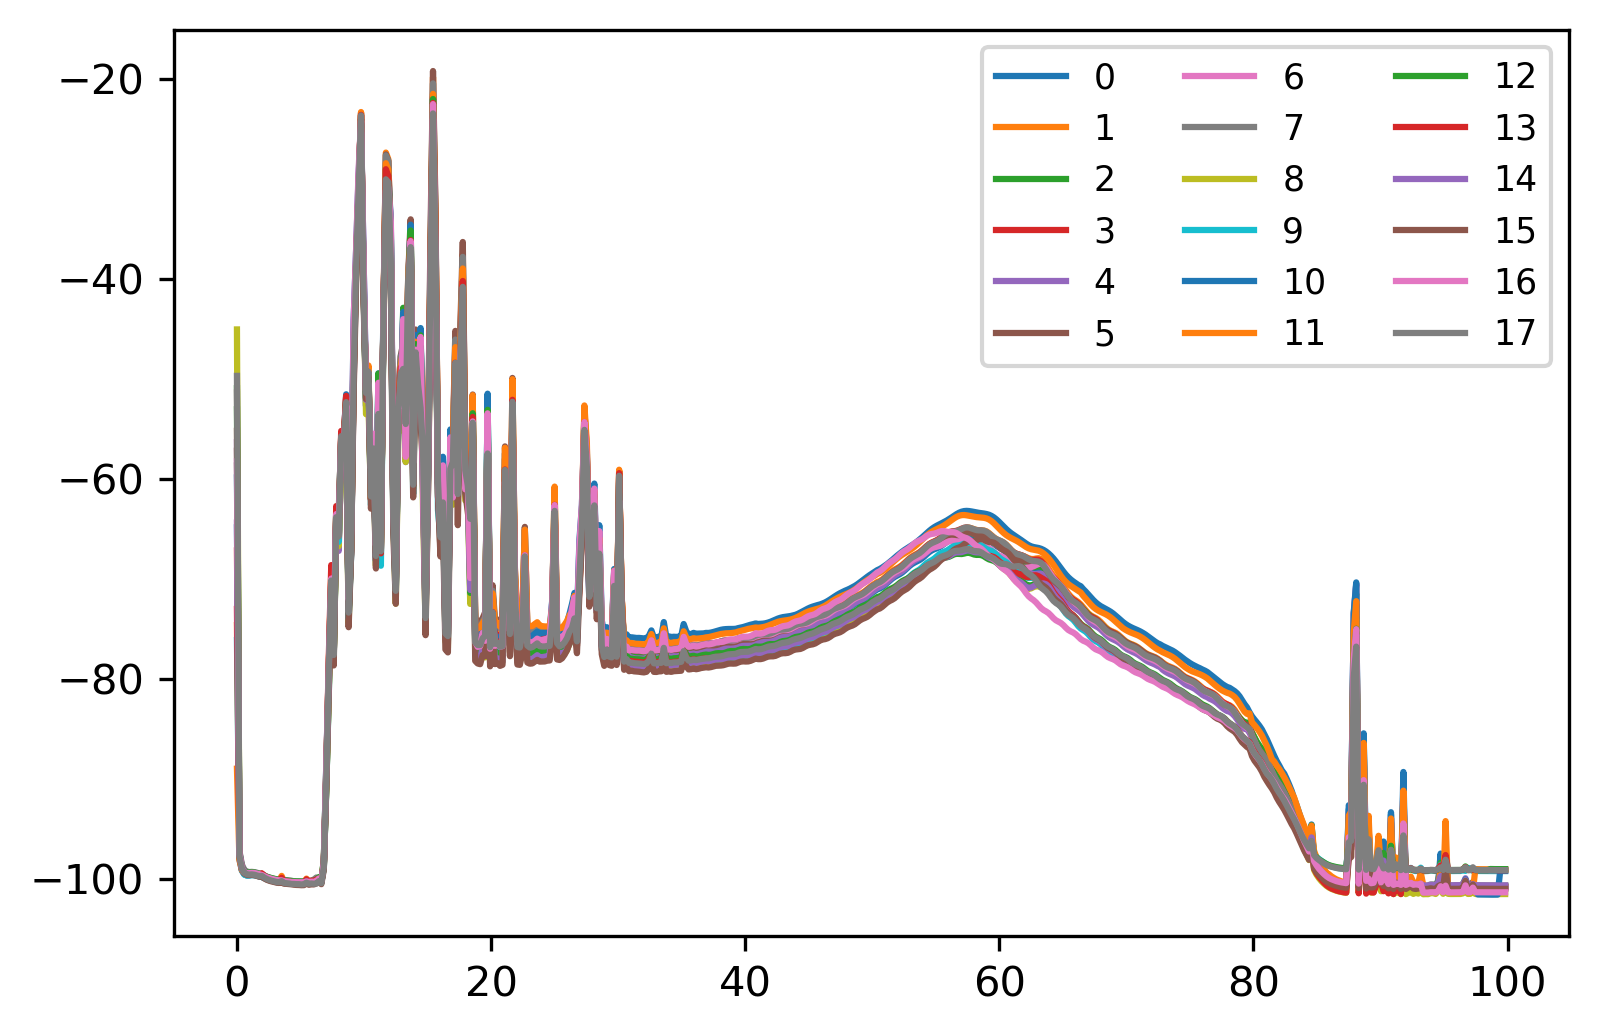

In [7]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis[:18]):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

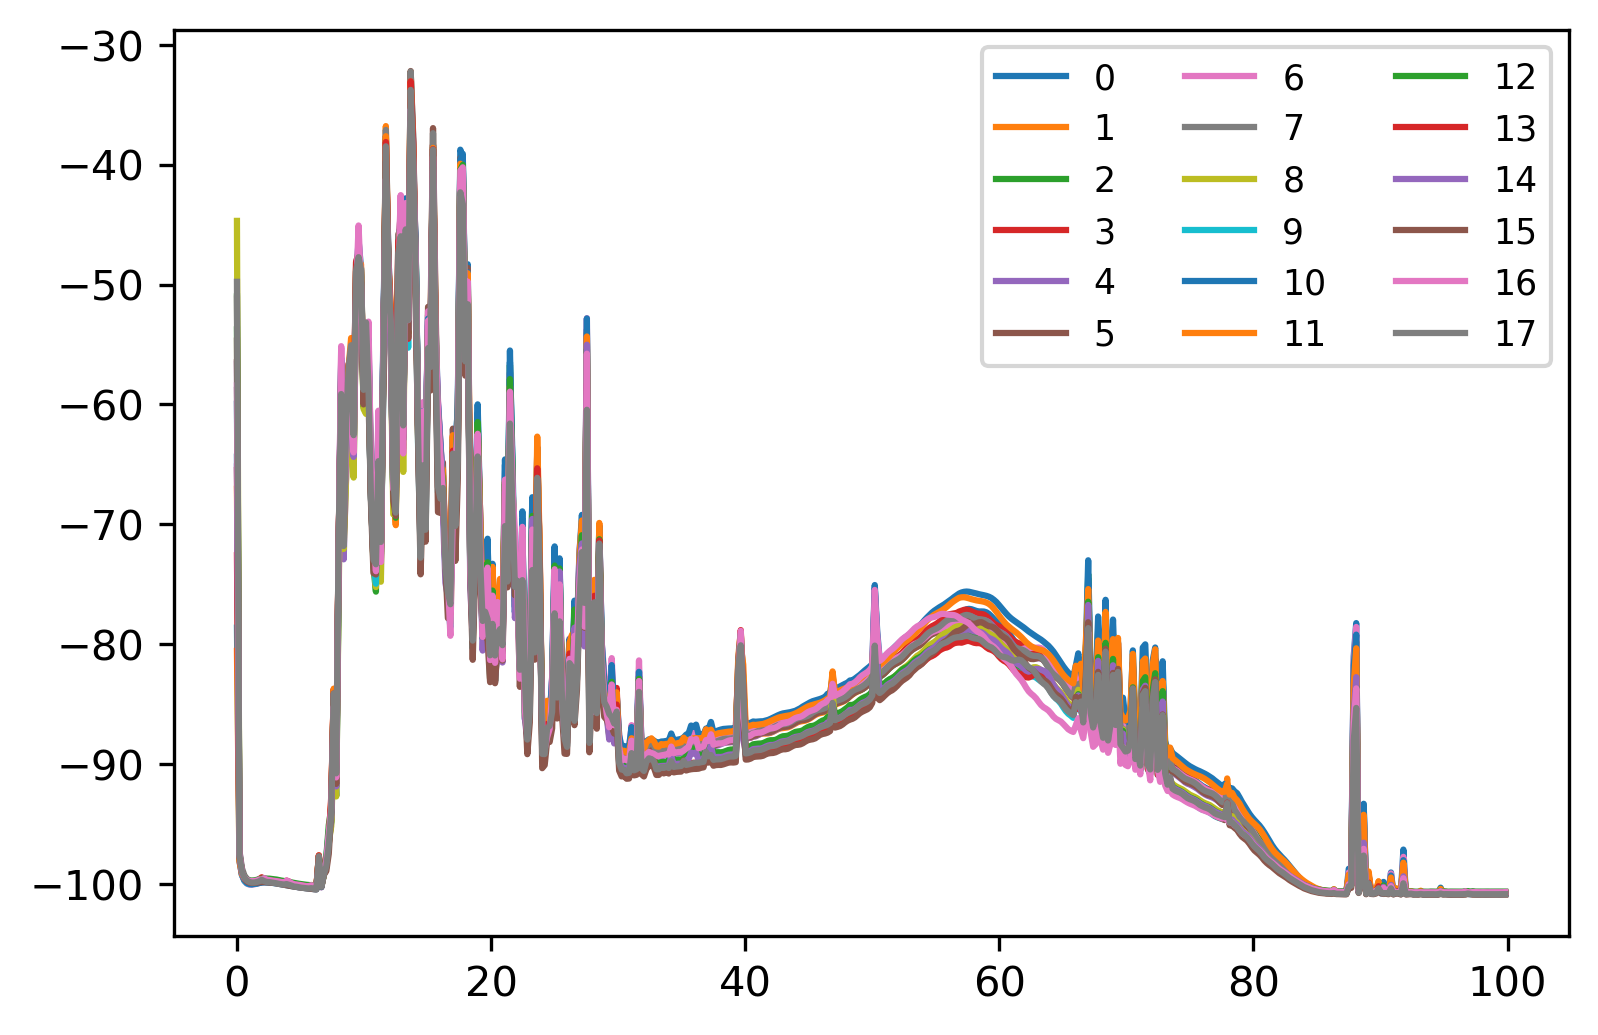

In [45]:
plt.figure(dpi=300)
Dm=np.max(D,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

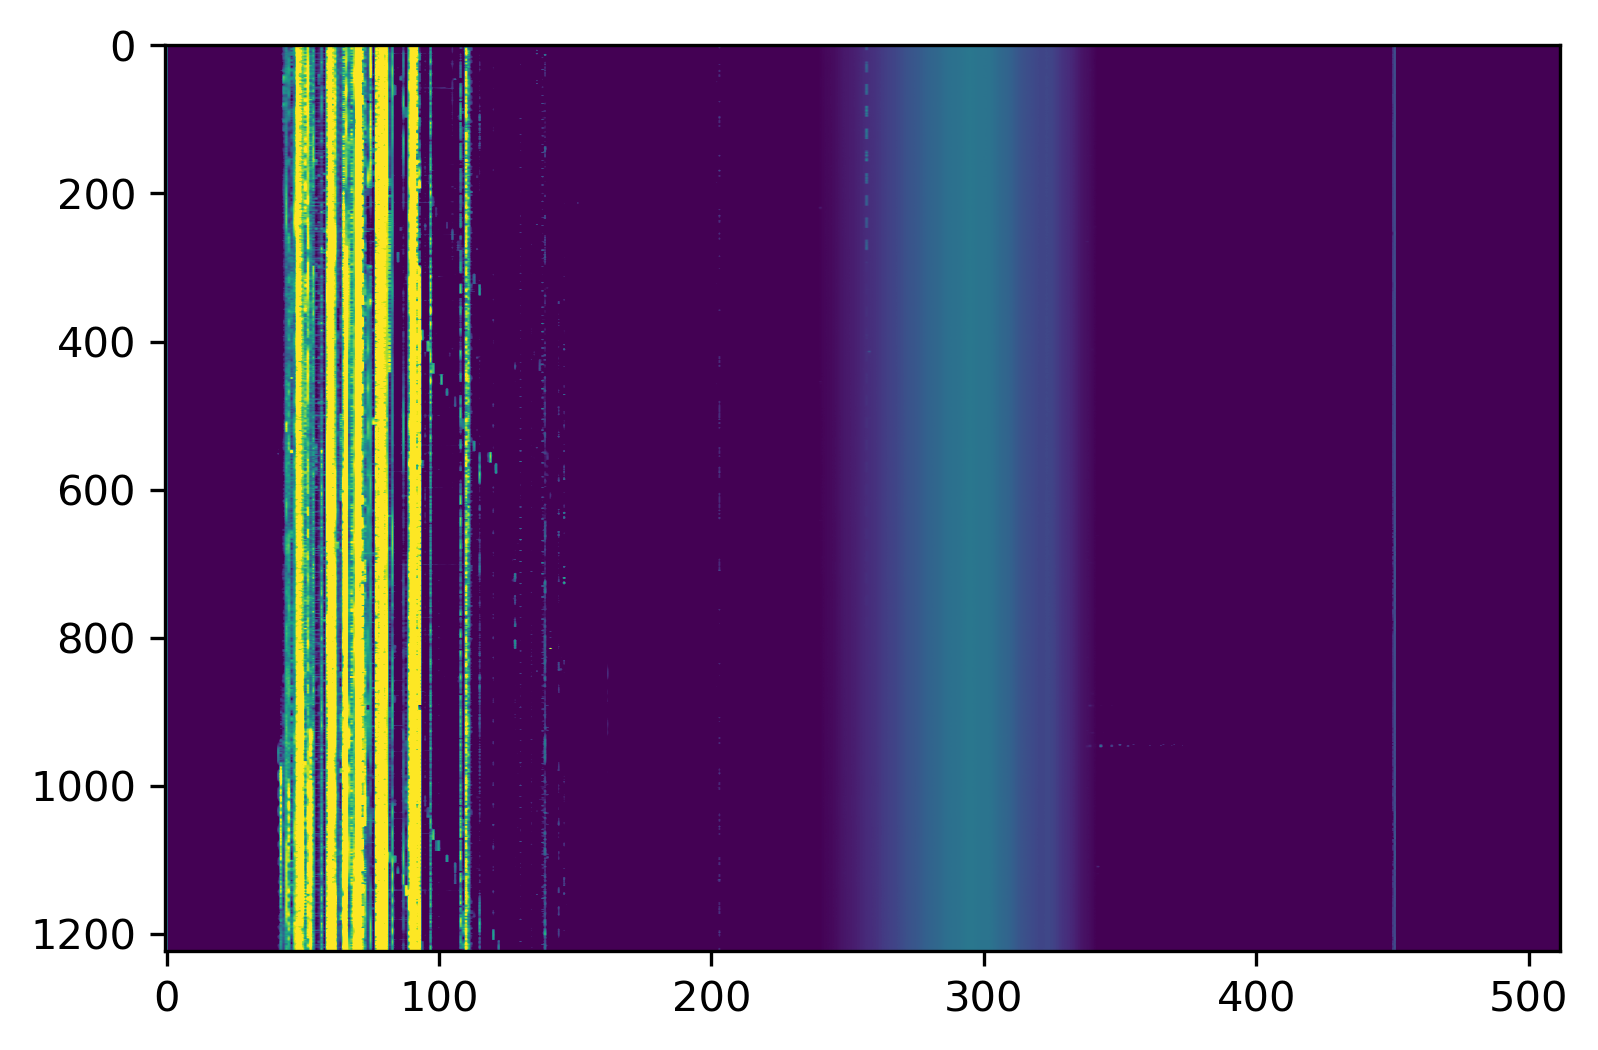

In [46]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

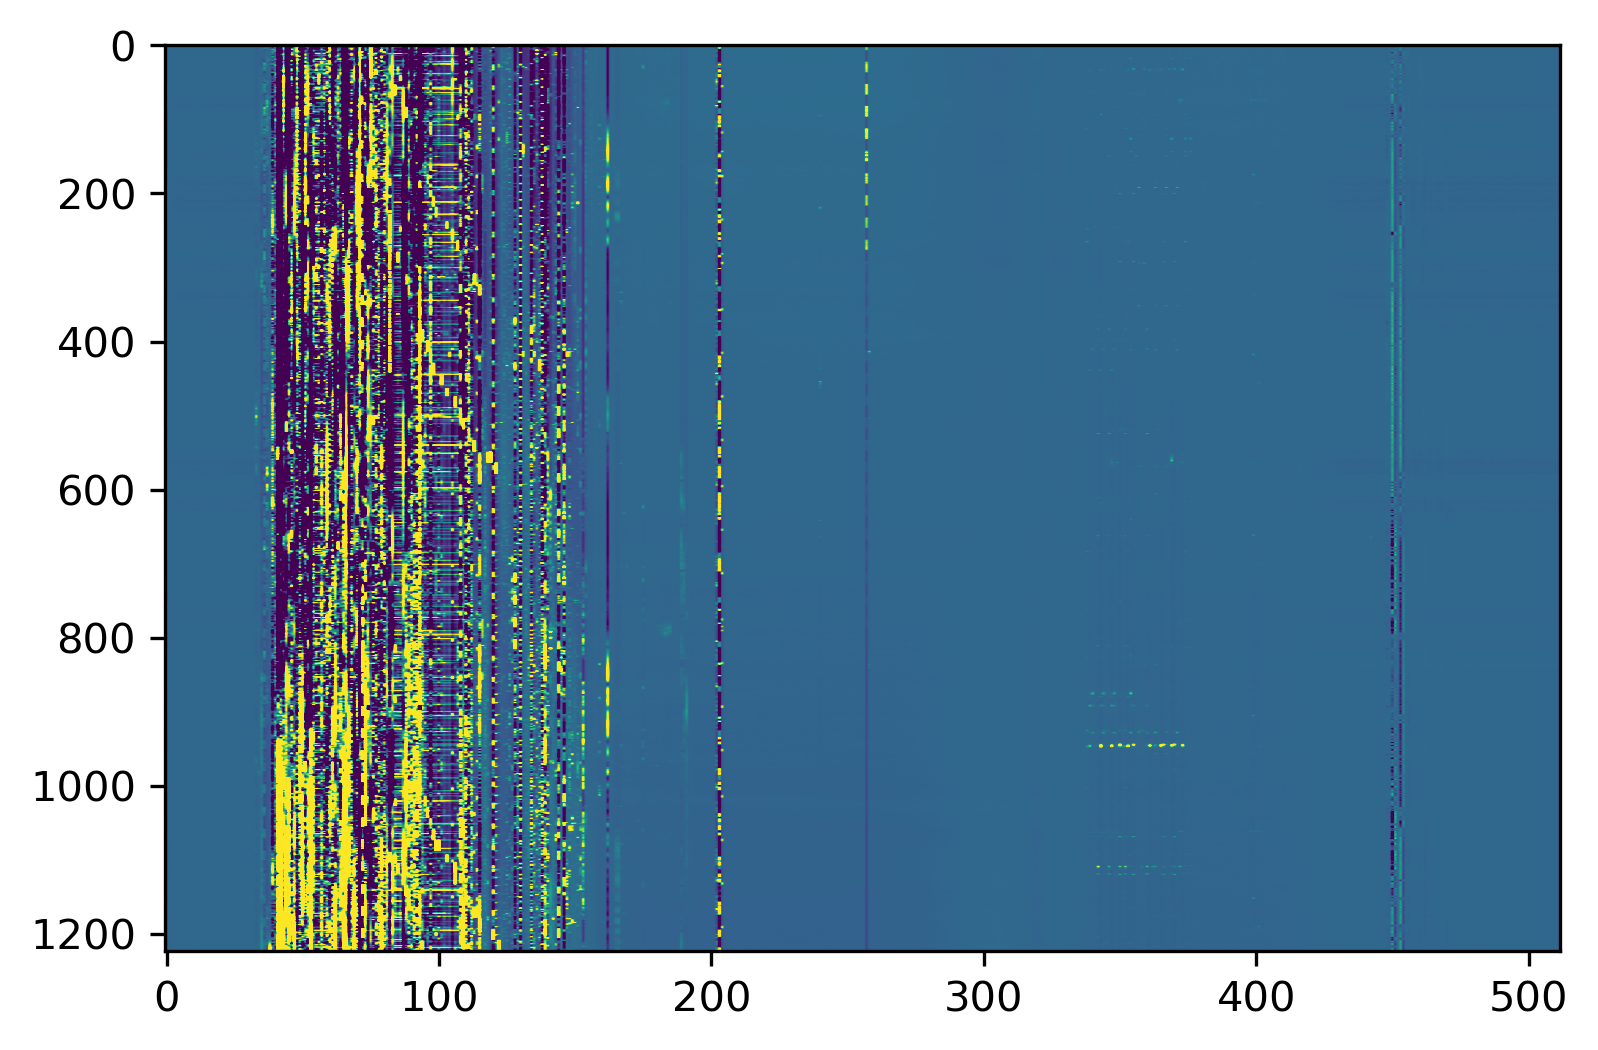

In [47]:
plt.figure(dpi=300)
XX=10*np.log10(D[:,:6,:]).mean(axis=1)
XX-=XX.mean(axis=0)

plt.imshow(XX,aspect='auto',vmin=-1,vmax=2)
#plt.xlim(150,450)
#plt.ylim(1500,2000)
#plt.colorbar()

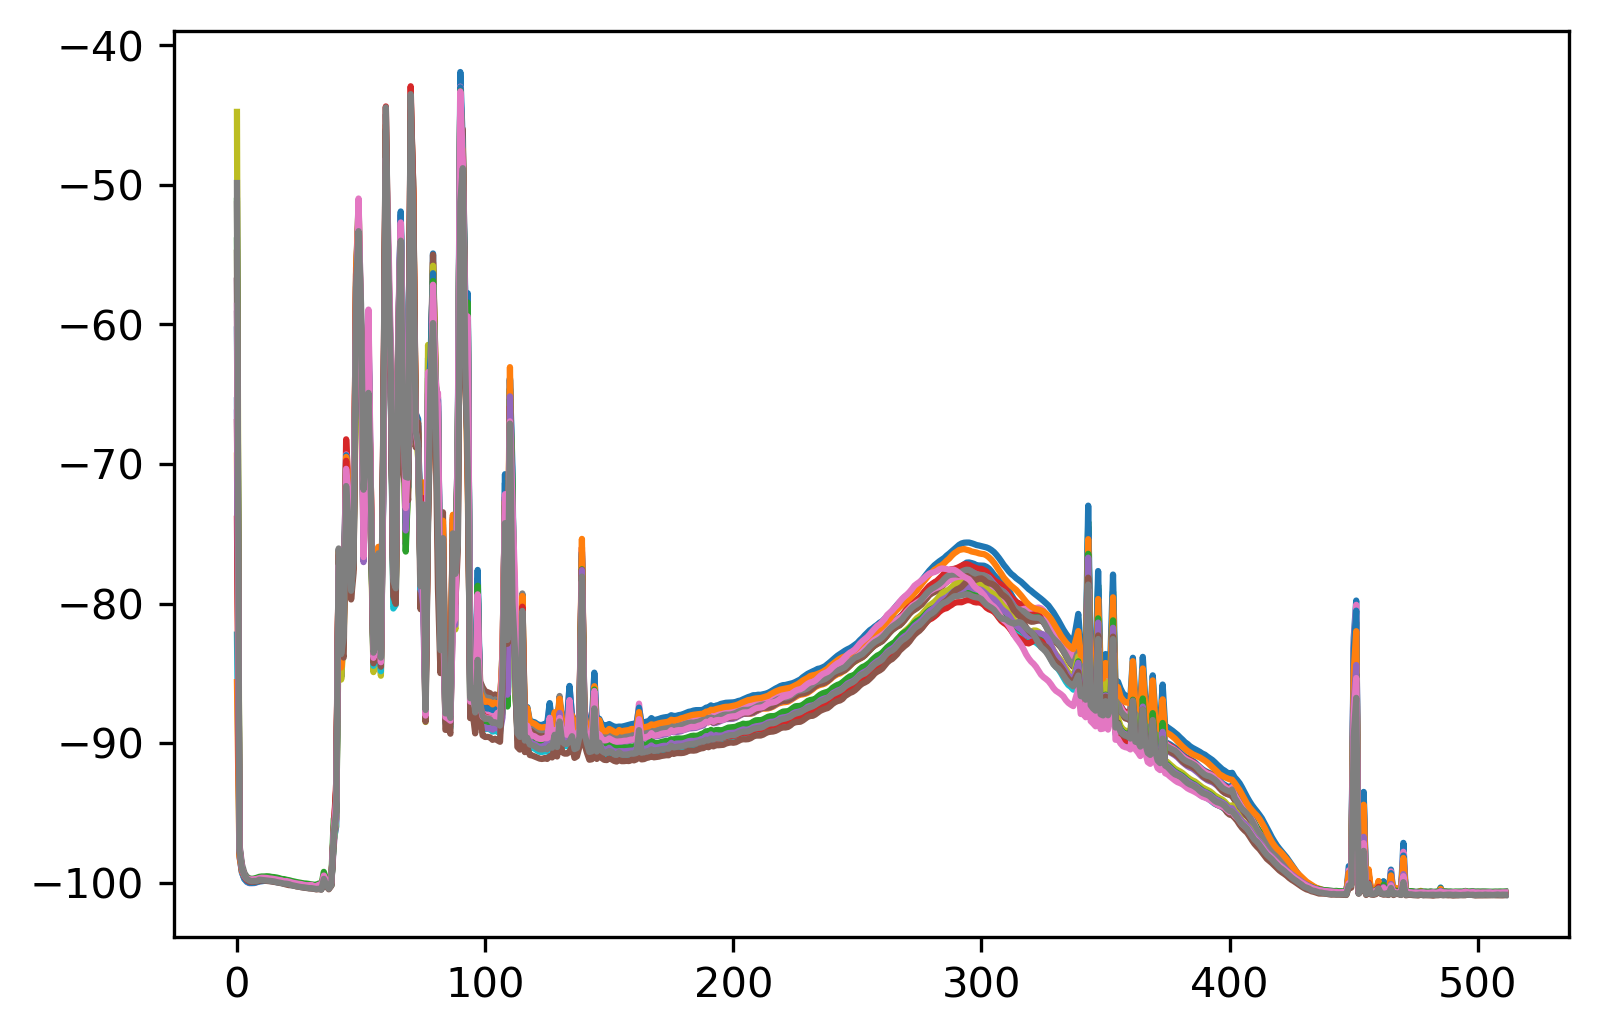

In [61]:
plt.figure(dpi=300)
plt.plot(10*np.log10(D[946,:,:]).T-GainADC);

/tmp/ipykernel_348197/2640272261.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)


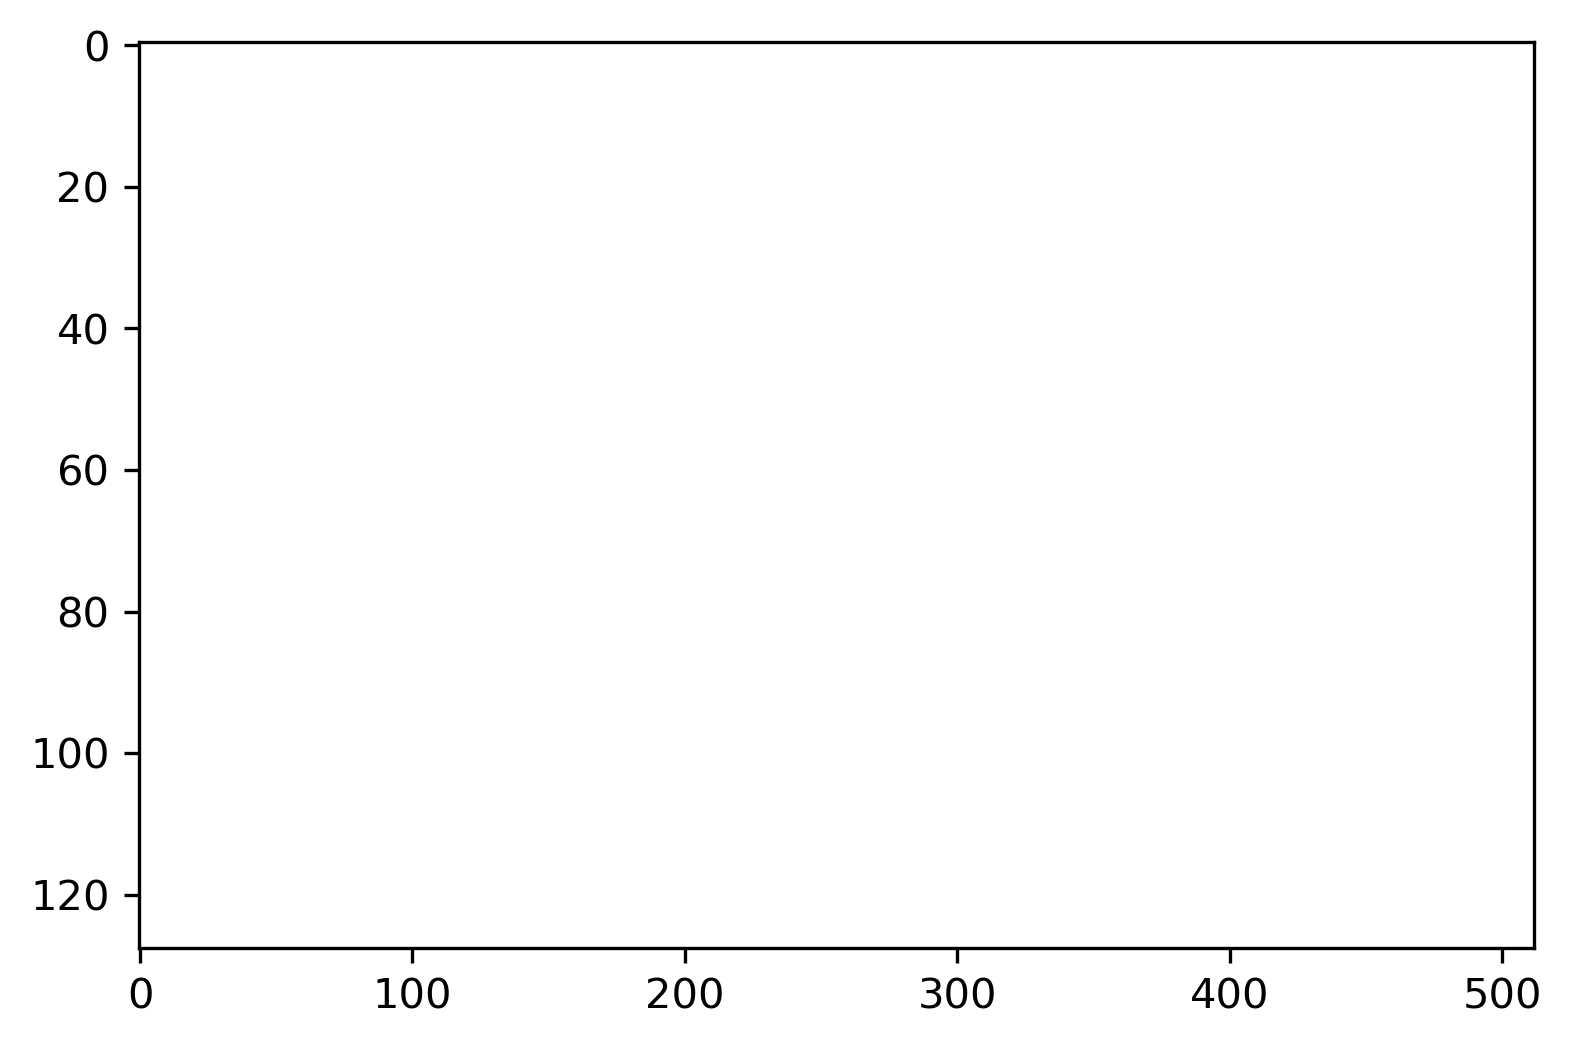

In [8]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

In [15]:
print(sis[6])

18
